<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/%20VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [43]:
# Diretórios de treinamento, teste e validação
train_dir = '../content/fruits_v2/train'
test_dir = '../content/fruits_v2/test'
val_dir = '../content/fruits_v2/val'

In [45]:
# Função para criar o DataFrame
def create_dataframe_from_directory(directory, class_name):
    file_paths = []
    for root, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg'):  # Ajuste a extensão conforme necessário
                file_paths.append(os.path.join(root, filename))
    df = pd.DataFrame({'img_path': file_paths, 'class': class_name})
    return df

# Criação dos DataFrames
train_df = create_dataframe_from_directory(train_dir, 'train')
test_df = create_dataframe_from_directory(test_dir, 'test')
val_df = create_dataframe_from_directory(val_dir, 'val')

# Exemplo de visualização do DataFrame de treinamento
print(train_df.head())

                                            img_path  class
0  ../content/fruits_v2/train/Strawberry/Strawber...  train
1  ../content/fruits_v2/train/Strawberry/Strawber...  train
2  ../content/fruits_v2/train/Strawberry/Strawber...  train
3  ../content/fruits_v2/train/Strawberry/Strawber...  train
4  ../content/fruits_v2/train/Strawberry/Strawber...  train


In [ ]:
for className in os.listdir(train_dir):
    for filename in os.listdir(os.path.join(train_dir,className)):
        img_path=(os.path.join(train_dir,className,filename))
        traindf=traindf.append({'img_path':img_path,'class':className},ignore_index=True)


In [ ]:
for className in os.listdir(test_dir):
    for filename in os.listdir(os.path.join(test_dir,className)):
        img_path=(os.path.join(test_dir,className,filename))
        test_df=test_df.append({'img_path':img_path,'class':className},ignore_index=True)

In [48]:
#create validation set from training data
train_df,valid_df=train_test_split(traindf,test_size=0.1,random_state=0)
len(train_df), len(test_df), len(valid_df)

(21216, 3412, 2358)

In [49]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21216 entries, 5464 to 2732
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  21216 non-null  object
 1   class     21216 non-null  object
dtypes: object(2)
memory usage: 497.2+ KB
None


In [50]:
print(train_df.head())

                                                img_path           class
5464      ../content/fruits_v2/train/Peach/Peach_114.jpg           Peach
5165   ../content/fruits_v2/train/Apple Braeburn/Appl...  Apple Braeburn
11093  ../content/fruits_v2/train/Onion White/Onion W...     Onion White
10476       ../content/fruits_v2/train/Pear/Pear_110.jpg            Pear
20976  ../content/fruits_v2/train/Cucumber Ripe/Cucum...   Cucumber Ripe


In [51]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  3412 non-null   object
 1   class     3412 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB
None


In [52]:
print(valid_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2358 entries, 21125 to 19904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  2358 non-null   object
 1   class     2358 non-null   object
dtypes: object(2)
memory usage: 55.3+ KB
None


In [ ]:
tf=train_df['class'].value_counts().to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "train_counts"},inplace=True)
tf1=test_df['class'].value_counts().to_frame().reset_index()
tf1.rename(columns={"index": "class", "class": "test_counts"},inplace=True)
tf2=valid_df['class'].value_counts().to_frame().reset_index()
tf2.rename(columns={"index": "class", "class": "valid_counts"},inplace=True)
df=pd.merge(tf,tf1,on='class')
df=pd.merge(df,tf2,on='class')
df

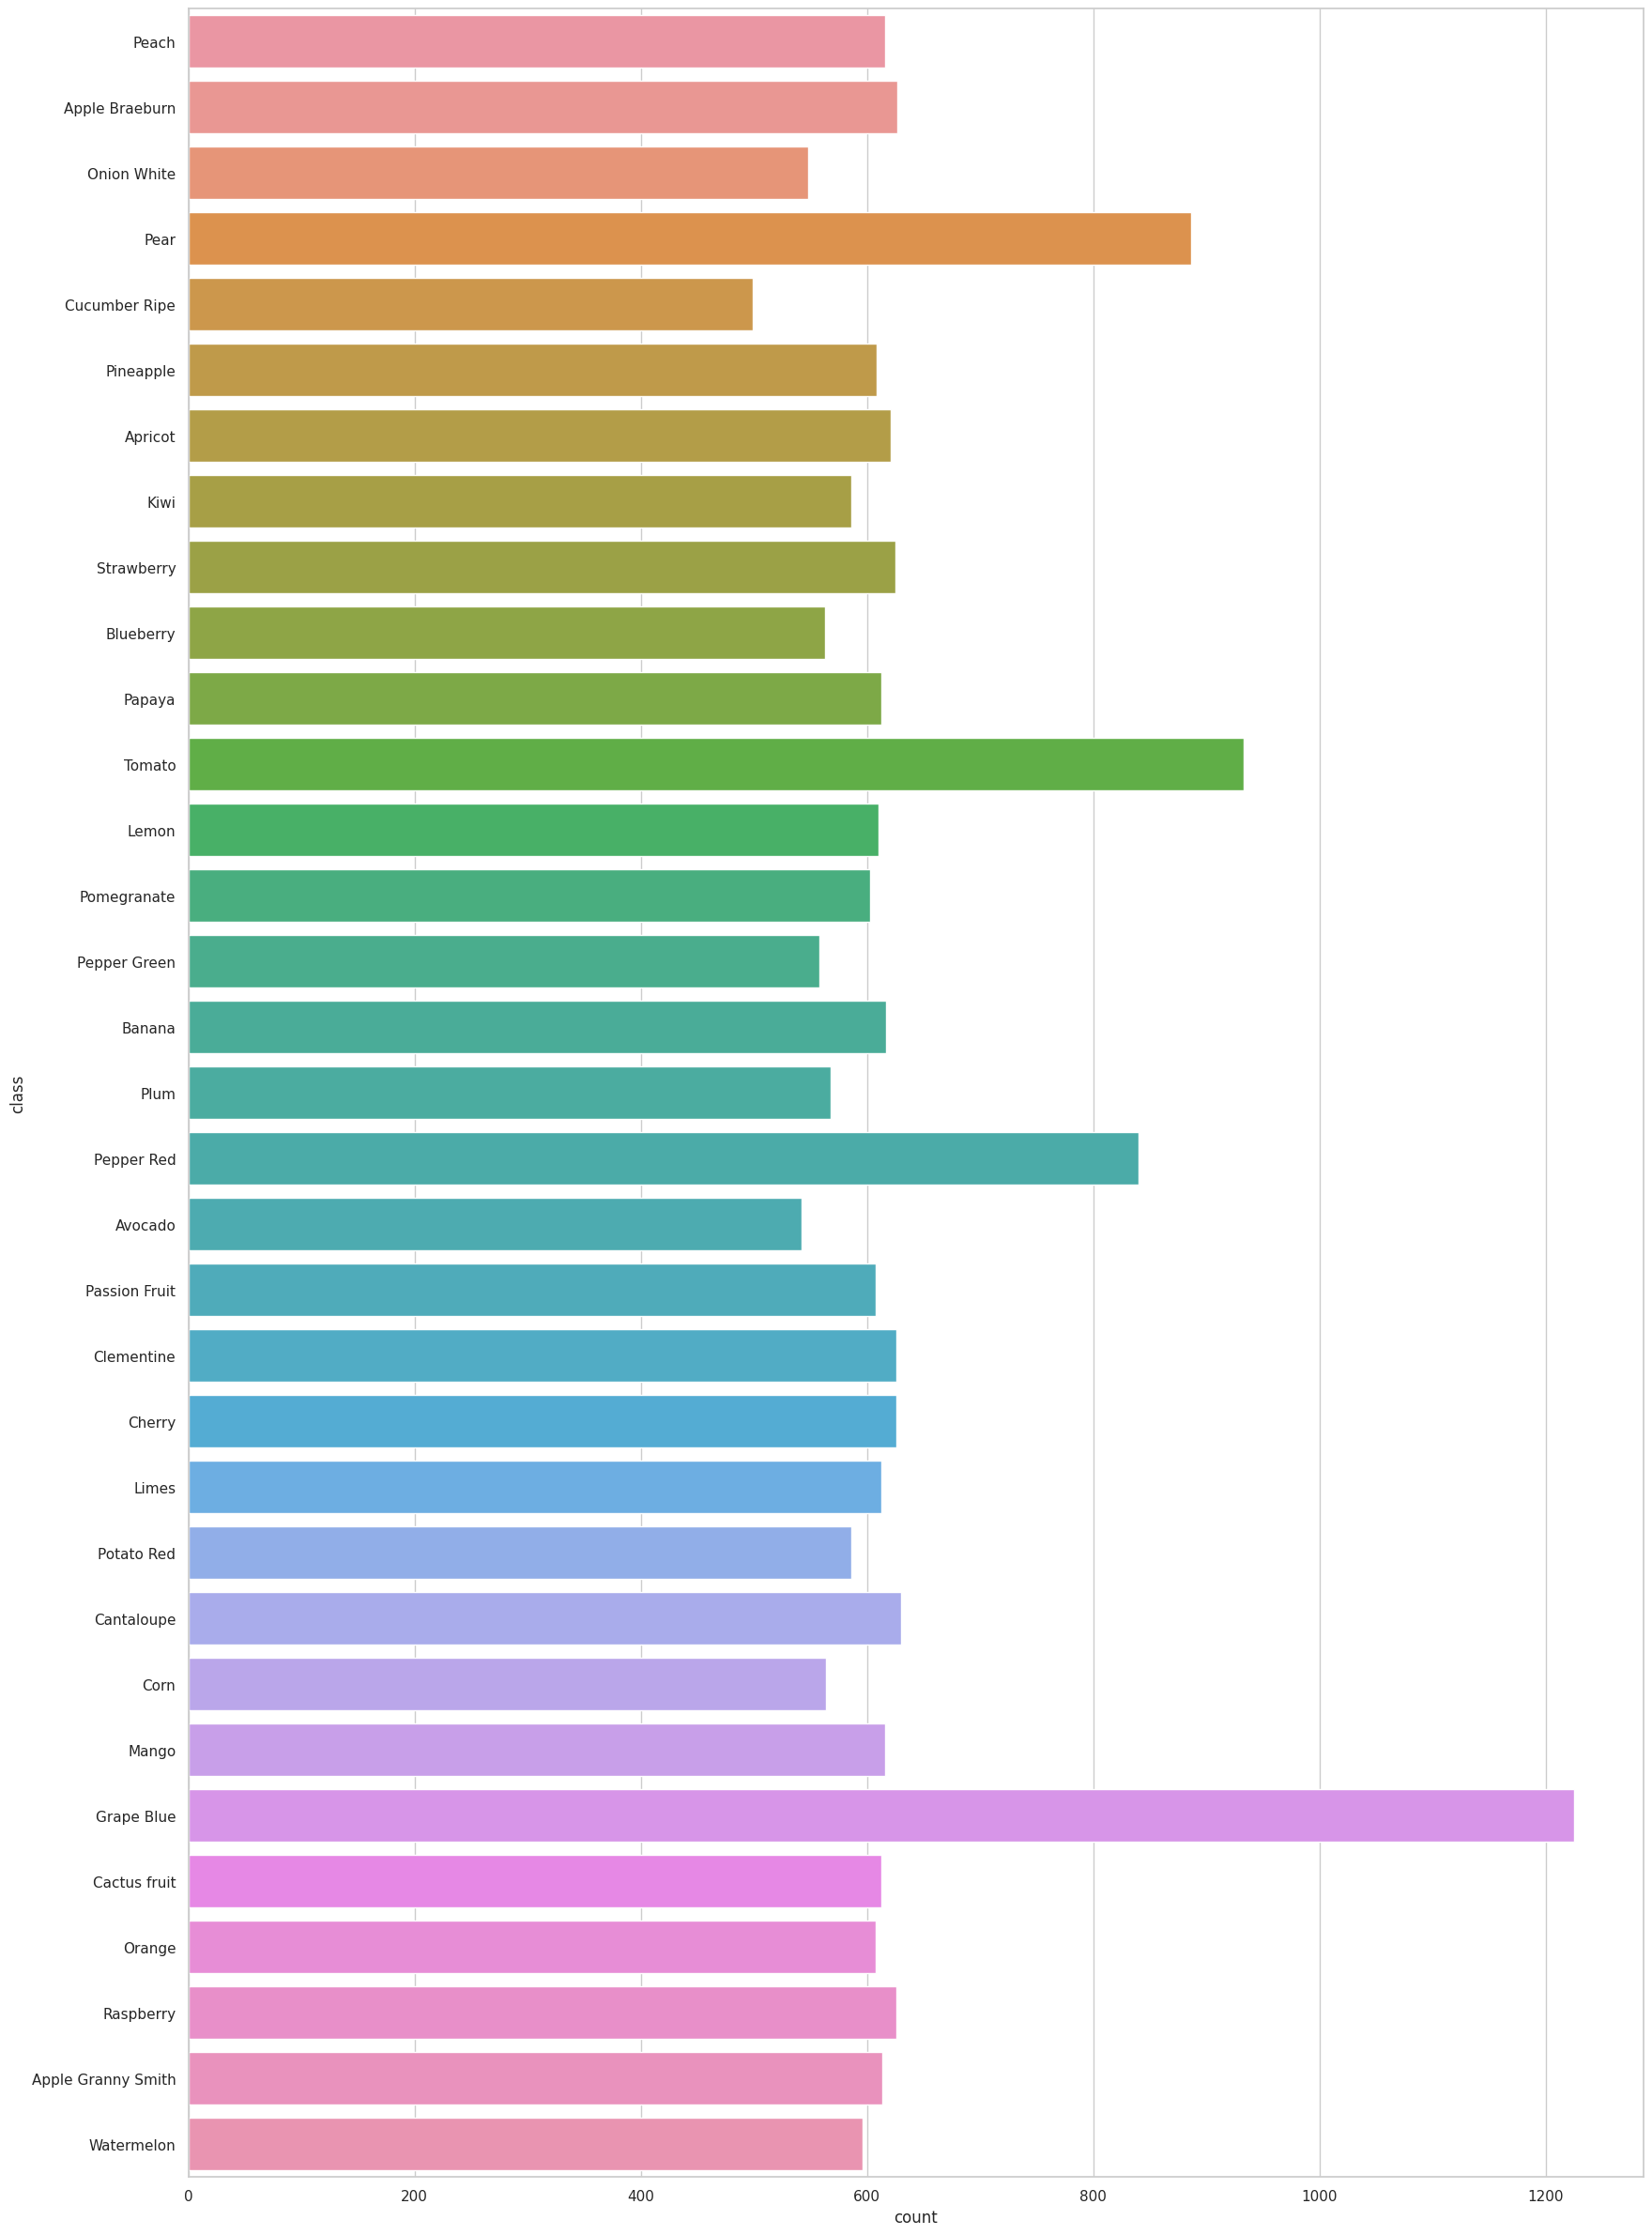

In [55]:
# Visualization (No of samples in each class of training data)
plt.figure(figsize=(20,30))
g=sns.countplot(y='class',data=train_df)
#g.set_xticklabels(g.get_xticklabels(), rotation=90)

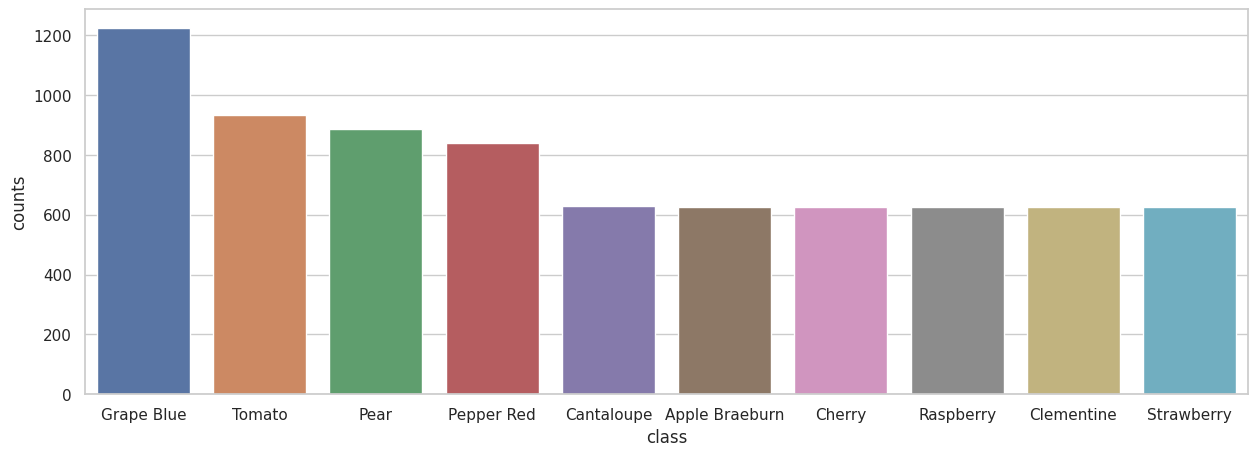

In [56]:
#top 10 classes in training data (highest number of samples)
tf=train_df['class'].value_counts()[:10]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

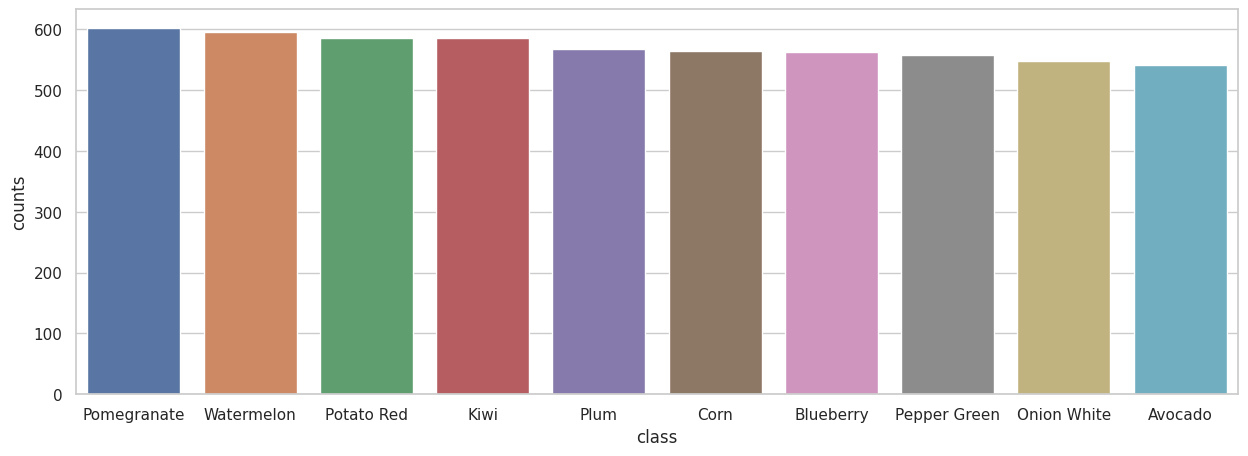

In [57]:
#bottom 10 classes in training data (lowest number of samples)
tf=train_df['class'].value_counts()[-11:-1]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)

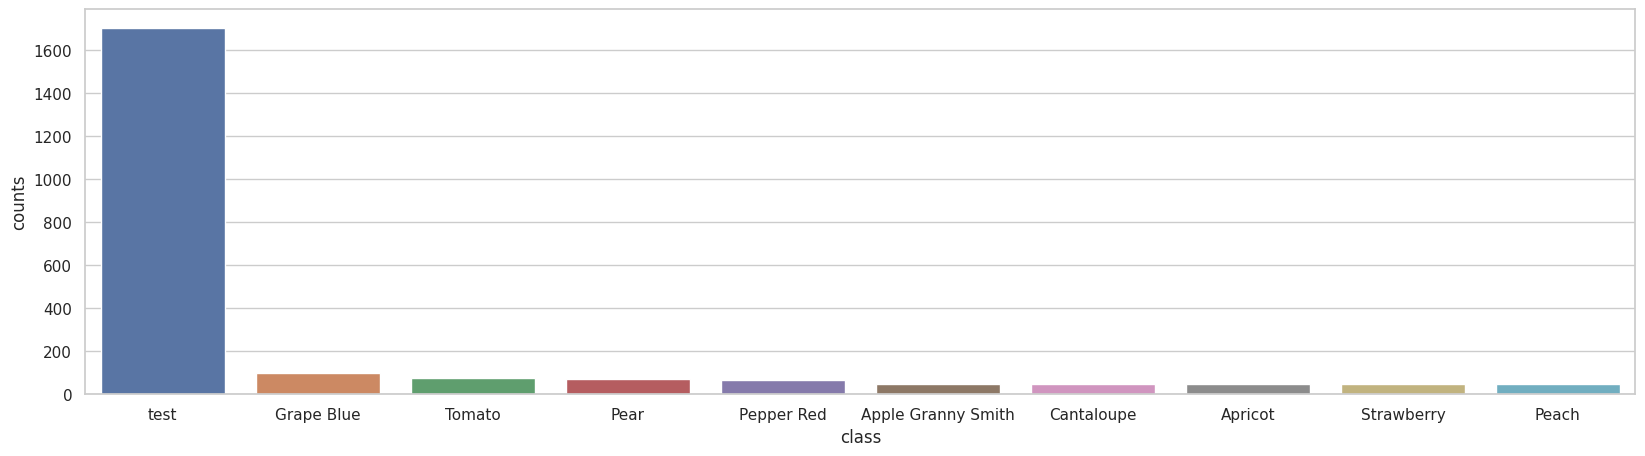

In [58]:
#top 10 classes in testing data(highest number of samples)
tf=test_df['class'].value_counts()[:10]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(20,5))
g=sns.barplot(x='class',y='counts',data=tf)

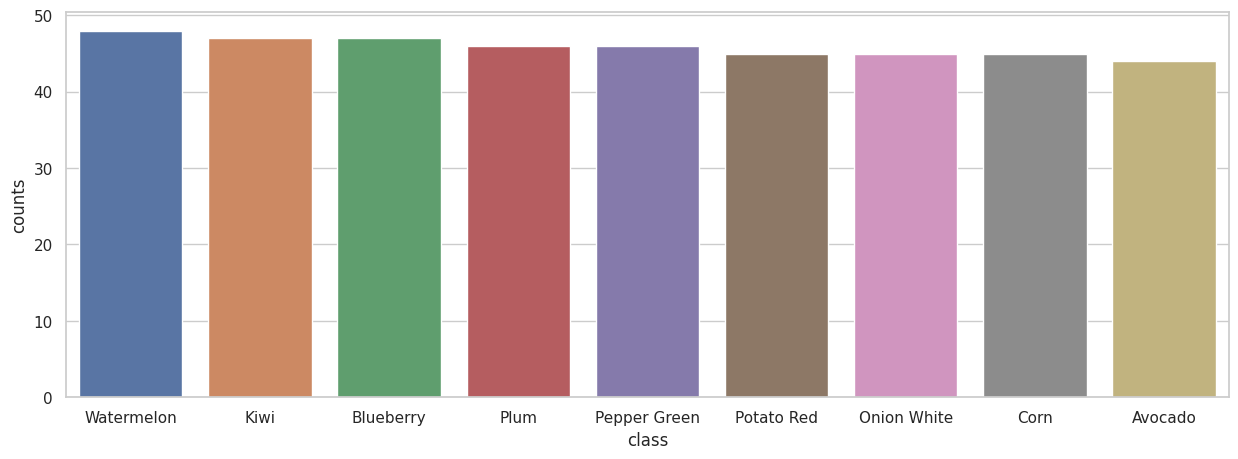

In [59]:
#bottom 10 classes in testing data(lowest number of samples)
tf=test_df['class'].value_counts()[-10:-1]
tf=tf.to_frame().reset_index()
tf.rename(columns={"index": "class", "class": "counts"},inplace=True)
plt.figure(figsize=(15,5))
g=sns.barplot(x='class',y='counts',data=tf)


In [60]:
img=cv2.imread(train_df['img_path'][1])
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f'The size of image is {img.shape}')

The size of image is (100, 100, 3)


In [ ]:
#plot 10 random images of fruits from the training set
plt.figure(figsize=(20,10))
for i in range(10):
    rand_int=np.random.randint(1,len(train_df))
    print(rand_int)
    img=cv2.imread(train_df['img_path'][rand_int])
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.grid(b=False)
    plt.title(train_df['class'][rand_int])

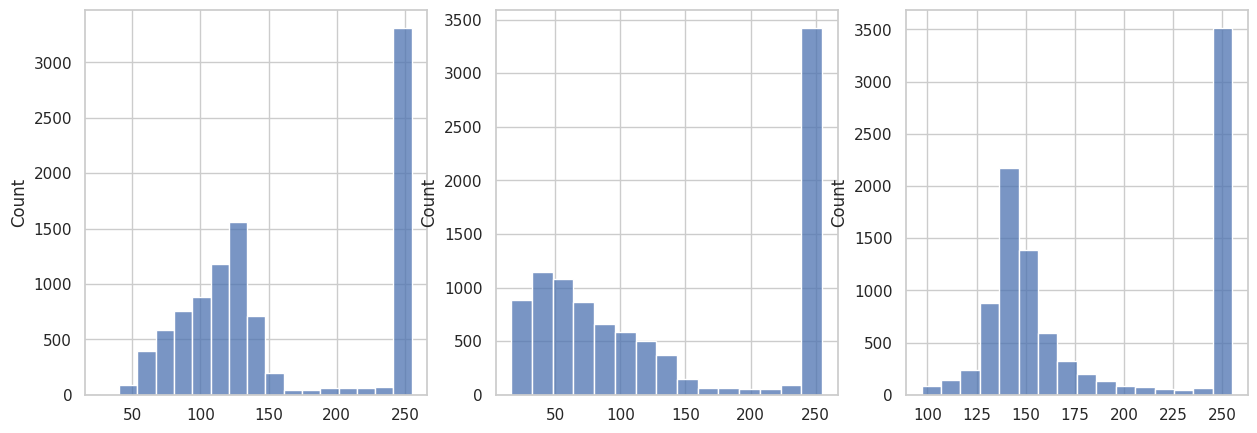

In [78]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
g1=sns.histplot(data=img[:,:,0].ravel(),ax=axes[0])
g2=sns.histplot(data=img[:,:,1].ravel(),ax=axes[1])
g3=sns.histplot(data=img[:,:,2].ravel(),ax=axes[2])

In [64]:
train_df.head()

,img_path,class
5464,../content/fruits_v2/train/Peach/Peach_114.jpg,Peach
5165,../content/fruits_v2/train/Apple Braeburn/Appl...,Apple Braeburn
11093,../content/fruits_v2/train/Onion White/Onion W...,Onion White
10476,../content/fruits_v2/train/Pear/Pear_110.jpg,Pear
20976,../content/fruits_v2/train/Cucumber Ripe/Cucum...,Cucumber Ripe


In [65]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
x_col="img_path",
y_col='class',
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

validation_generator=train_datagen.flow_from_dataframe(
dataframe=valid_df,
x_col="img_path",
y_col='class',
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
x_col="img_path",
y_col='class',
batch_size=1,
seed=42,
shuffle=True,
class_mode="categorical",target_size=(224,224))

Found 21216 validated image filenames belonging to 33 classes.
Found 2358 validated image filenames belonging to 33 classes.
Found 3412 validated image filenames belonging to 34 classes.


In [66]:
train_generator.image_shape

(224, 224, 3)

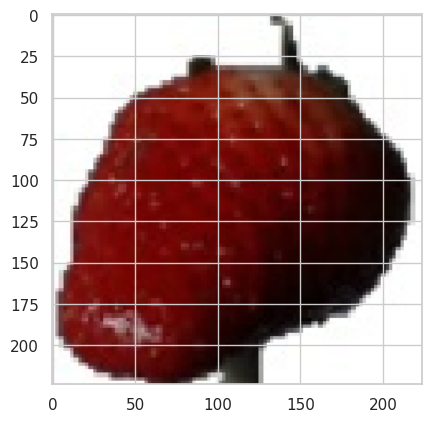

In [67]:
img1=train_generator.next()[0]
fig=plt.imshow(img1[0,:,:,:])

In [68]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model
from keras.callbacks import EarlyStopping
import keras

In [69]:
model=VGG16(input_shape=(224,224,3), weights='imagenet')
earlystopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=3 )

In [70]:
for layer in model.layers[:-1]:
    layer.trainable=False
#for layer in model.layers[15:]:
    #layer.trainable=True

In [39]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [71]:
pretrained_last_layer=model.get_layer(name=model.layers[-2].name)
pretrained_output=pretrained_last_layer.output
next_layer= layers.Dense(131, activation='softmax')(pretrained_output)
pretrained_vgg = Model(model.input, next_layer)

In [41]:
pretrained_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [72]:
pretrained_vgg.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam() ,metrics=['accuracy'])

In [ ]:
batch_size=64
history=pretrained_vgg.fit(train_generator,validation_data=validation_generator,epochs=8,callbacks=earlystopping)

In [ ]:
https://www.kaggle.com/code/himakshi2110/fruit-360-classification-using-vgg16